In [1]:
def paths(p):
  """
  Navigate through Drive paths to access files from a particular folder
  takes one args

  """
  # Specify the folder path within your Google Drive
  folder_path = p
  # List files in the folder
  file_paths = []
  file_name = []
  for root, dirs, files in os.walk(folder_path):
      for file in files:
          file_paths.append(os.path.join(root, file))
          file_name.append(file)
          # print(f"File Path: {os.path.join(root, file)}")
  return file_paths,file_name

In [2]:
import os
pa = ['E://human//archive//Road_Anomaly_Dataset//Road_Anomaly_Dataset//train//Accident',
'E://human//archive//Road_Anomaly_Dataset//Road_Anomaly_Dataset//train//Fight',
'E://human//archive//Road_Anomaly_Dataset//Road_Anomaly_Dataset//train//Fire',
'E://human//archive//Road_Anomaly_Dataset//Road_Anomaly_Dataset//train//Snatching']

name = ['Accident','Fight','Fire','Snatching']

In [3]:
import pandas  as pd

df = pd.DataFrame(columns=['Name','Path','Target'])

In [4]:
for i, folder_path in enumerate(pa):
    file_paths, file_names = paths(folder_path)
    for file_path, file_name in zip(file_paths, file_names):
        new_row = {'Name': file_name, 'Path': file_path, 'Target': name[i]}
        df.loc[len(df)] = new_row

In [5]:
df

,Name,Path,Target


In [6]:
df.describe()

,Name,Path,Target
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN


In [11]:
df.info

<bound method DataFrame.info of                    Name                                               Path  \
0       ACC_011 (1).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
1      ACC_011 (10).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
2     ACC_011 (100).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
3     ACC_011 (101).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
4     ACC_011 (102).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
...                 ...                                                ...   
2630  Snatch_1 (95).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
2631  Snatch_1 (96).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
2632  Snatch_1 (97).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
2633  Snatch_1 (98).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   
2634  Snatch_1 (99).jpg  E://human//archive//Road_Anomaly_Dataset//Road...   

         Target  
0      Accide

In [12]:
df['Target'].unique()

array(['Accident', 'Fight', 'Fire', 'Snatching'], dtype=object)

In [13]:
df.to_csv("Pathdf.csv")

In [7]:
import pandas  as pd
df = pd.read_csv("../Datasets/Pathdf.csv")
df.head()

,Unnamed: 0,Name,Path,Target
0,0,ACC_011 (1).jpg,E://human//archive//Road_Anomaly_Dataset//Road...,Accident
1,1,ACC_011 (10).jpg,E://human//archive//Road_Anomaly_Dataset//Road...,Accident
2,2,ACC_011 (100).jpg,E://human//archive//Road_Anomaly_Dataset//Road...,Accident
3,3,ACC_011 (101).jpg,E://human//archive//Road_Anomaly_Dataset//Road...,Accident
4,4,ACC_011 (102).jpg,E://human//archive//Road_Anomaly_Dataset//Road...,Accident


# Become one with the data (visualizing)

In [8]:
import os
for dirpaths,dirnames,filenames in os.walk('../Datasets/Road_Anomaly_Dataset'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpaths}. ")

There are 3 directories and 0 images in ../Datasets/Road_Anomaly_Dataset. 
There are 4 directories and 0 images in ../Datasets/Road_Anomaly_Dataset\test. 
There are 0 directories and 241 images in ../Datasets/Road_Anomaly_Dataset\test\Accident. 
There are 0 directories and 155 images in ../Datasets/Road_Anomaly_Dataset\test\Fight. 
There are 0 directories and 100 images in ../Datasets/Road_Anomaly_Dataset\test\Fire. 
There are 0 directories and 149 images in ../Datasets/Road_Anomaly_Dataset\test\Snatching. 
There are 4 directories and 0 images in ../Datasets/Road_Anomaly_Dataset\train. 
There are 0 directories and 872 images in ../Datasets/Road_Anomaly_Dataset\train\Accident. 
There are 0 directories and 724 images in ../Datasets/Road_Anomaly_Dataset\train\Fight. 
There are 0 directories and 363 images in ../Datasets/Road_Anomaly_Dataset\train\Fire. 
There are 0 directories and 676 images in ../Datasets/Road_Anomaly_Dataset\train\Snatching. 
There are 4 directories and 0 images in ../D

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg 
import random

def veiw_Image(t_dir,t_class):
    target_folder= t_dir+t_class
    r_image = random.sample(os.listdir(target_folder),1)# 1 item sample
    img = mimg.imread(target_folder+'/'+r_image[0])
    plt.imshow(img)
    plt.title(t_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image shape: (224, 224, 3)


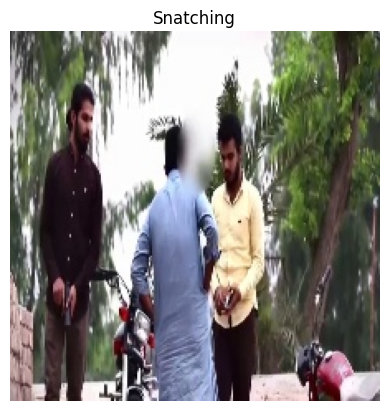

In [10]:
img = veiw_Image("../Datasets/Road_Anomaly_Dataset/train/","Snatching")

In [11]:
# img is an array so we can turn it into tensor
print(img.dtype)
import tensorflow as tf

uint8


In [12]:
print(tf.constant(img))

tf.Tensor(
[[[ 53  53  55]
  [ 89  89  91]
  [ 76  76  76]
  ...
  [ 53  60  52]
  [ 48  54  54]
  [139 144 147]]

 [[ 53  53  55]
  [ 85  85  87]
  [ 84  84  84]
  ...
  [ 78  85  77]
  [ 52  58  56]
  [ 75  81  81]]

 [[ 54  54  56]
  [ 88  88  90]
  [107 107 107]
  ...
  [ 77  85  74]
  [ 70  76  72]
  [ 78  84  82]]

 ...

 [[169 149 150]
  [164 144 145]
  [179 154 157]
  ...
  [ 90  78  88]
  [ 82  72  81]
  [108  98 106]]

 [[163 143 144]
  [164 144 145]
  [173 148 151]
  ...
  [ 87  77  86]
  [103  93 102]
  [108  98 107]]

 [[161 141 142]
  [167 147 148]
  [170 145 148]
  ...
  [ 93  83  94]
  [100  90  99]
  [107  97 106]]], shape=(224, 224, 3), dtype=uint8)


In [13]:
img.shape #(W,H,channels)

(224, 224, 3)

In [14]:
# Cnn model to find patterns 
# Input -> Load Image -> Preprocess -> build CNN -> compile -> fit

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# seed
tf.random.set_seed(45)
#Scale and normalize
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale= 1./255) # Generate batches of data with augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)
train_dir = '../Datasets/Road_Anomaly_Dataset/train'
test_dir = '../Datasets/Road_Anomaly_Dataset/test'
val_dir = '../Datasets/Road_Anomaly_Dataset/val'
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")


Found 2635 images belonging to 4 classes.
Testing images:
Found 645 images belonging to 4 classes.


In [16]:
test_data = train_datagen.flow_from_directory(test_dir, batch_size=32,target_size=(224, 224),seed=45, class_mode='categorical')
val_data = valid_datagen.flow_from_directory(val_dir, batch_size=32,target_size=(224, 224),seed=45, class_mode='categorical')

Found 645 images belonging to 4 classes.
Found 139 images belonging to 4 classes.


# Callbacks
(Things to run while our model trains) extra functionality to be performed during or after training.)
1. Tensorboard callback: log comparison of many models and   compare these models visually on tensorboard
2. Model Checkpoint
3. Early Stopping


In [17]:
# create TFboard callback and we need a afunction which needs to be called each time
import datetime
import tensorflow as tf
def create_tfboard_callback(dir_name, exp_name):
    log_dir = dir_name + '/' +exp_name +'/'+datetime.datetime.now()
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f" Saving tdboard files in {log_dir}")
    return tensorboard_callback

# using resources like tensorflowhub and paperswith code we can select pretrained models here we will use efficient net and resnet

In [2]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
m1 = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-classification/1")
])
# m1.build([None, expect_img_size, expect_img_size, 3])  # Batch input shape.

# import tensorflow_hub as hub
m2 = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/101-classification/2")
])
# m2.build([None, 224, 224, 3])  # Batch input shape.


2.10.0


ModuleNotFoundError: No module named 'tensorflow_hub'

In [25]:
!pip install tensorflow-hub

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip


In [27]:
!pip list

Package                 Version
----------------------- ----------
absl-py                 2.1.0
astunparse              1.6.3
certifi                 2024.12.14
charset-normalizer      3.4.1
DateTime                5.5
distlib                 0.3.9
filelock                3.16.1
flatbuffers             24.12.23
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.69.0
h5py                    3.12.1
idna                    3.10
keras                   3.8.0
libclang                18.1.1
Markdown                3.7
markdown-it-py          3.0.0
MarkupSafe              3.0.2
mdurl                   0.1.2
ml-dtypes               0.4.1
namex                   0.0.8
numpy                   2.0.2
opt_einsum              3.4.0
optree                  0.13.1
packaging               24.2
pip                     24.2
platformdirs            4.3.6
protobuf                5.29.3
Pygments                2.19.1
pytz                    2024.2
requests                